In [1]:
import gudhi as gd
from gudhi import representations
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
import pingouin as pg
import scipy.stats as st
from collections import defaultdict
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import paired_distances
from tqdm.notebook import tqdm
import scipy.spatial.distance as spdists
from scipy.optimize import  curve_fit

%matplotlib widget

In [2]:
def sampled_ecc_alpha(pointcloud, n_samples, max_filt_val):
    ac = gd.AlphaComplex(points = pointcloud)
    st = ac.create_simplex_tree()
    filt_values = np.linspace(0,max_filt_val,n_samples)
    ecc_values = np.zeros_like(filt_values)
    simplices = list(st.get_filtration())
    cur_val = 0
    i=0
    for (j,t) in enumerate(filt_values):
        while (i<len(simplices)) and (simplices[i][1]<=t):
            cur_val=cur_val +(-1)**(len(simplices[i][0])-1)
            i = i+1
        #print(t, cur_val)
        ecc_values[j] = cur_val
        
    return ecc_values

In [3]:
def get_ecc(data, n_samples, max_filt_val):
    eccs = []
    for dat in tqdm(data):
        ec = sampled_ecc_alpha(dat, n_samples, max_filt_val)
        eccs.append(ec)
    return eccs

In [4]:
def gen_rv(rv, N, n_samples):
        return [np.array([rv[0].rvs(N), rv[1].rvs(N).tolist(), rv[2].rvs(N).tolist()]).T for i in range(n_samples)]

In [5]:
def tail_frequency(array, t):
    #how often are elements of array >t?
    return (np.sum(array>t)/len(array))

In [8]:
rv_normal = st.norm()
rv_normal2_2 = st.norm(2,2)
rv_beta2_2 = st.beta(2, 2)
rv_beta5_5 = st.beta(5, 5)
rv_beta10_10 = st.beta(10, 10)
rv_laplace = st.laplace()
rv_uniform = st.uniform()
rv_t3 = st.t(df=3)
rv_t5 = st.t(df=5)
rv_t7 = st.t(df=7)
rv_t10 = st.t(df=10)
rv_gamma10_1 = st.gamma(10,1)
rv_gamma20_1 = st.gamma(20,1)
rv_gamma4_5 = st.gamma(4,5)
rv_gamma5_1= st.gamma(5,1)
rv_chisq4 = st.chi2(df=4)
rv_chisq10 = st.chi2(df=10)
rv_lorentz = st.cauchy()
rv_logistic = st.logistic()
rv_arcsine = st.arcsine()
rv_argus = st.argus(chi=1)
rv_cosine = st.cosine()


In [13]:
n=200
n_loops = 1000
d = 3

rvs= [[rv_uniform, rv_uniform, rv_uniform],
      [rv_beta2_2, rv_beta2_2, rv_beta2_2],
      [rv_beta5_5, rv_beta5_5,rv_beta5_5],
      [rv_beta10_10, rv_beta10_10, rv_beta10_10],
      [rv_argus, rv_argus, rv_argus],
      [rv_arcsine, rv_arcsine, rv_arcsine],
      [rv_uniform, rv_beta10_10, rv_beta10_10],
      [rv_uniform, rv_uniform, rv_beta10_10]]

rv_names=["UxUxU",
          "B22xB22XB22",
          "B55xB55xB55",
          "B1010xB1010xB1010",
          "ArgusxArgusxArgus",
          "asinxasinxasin",
          "UxB1010xB1010",
          "UxUxB1010"]

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:grey", "tab:olive", "tab:cyan"]


In [8]:
samples = [(n**(1/3)) * np.array(gen_rv(rv,n,n_loops)) for rv in tqdm(rvs)]
samples2 = [(n**(1/3)) * np.array(gen_rv(rv,n,n_loops)) for rv in tqdm(rvs)]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

In [54]:
n_vals = np.array([50,100,150,200,250,300,350,400,450,500])
ecc_dists = np.zeros((len(rvs),len(n_vals), n_loops))
#ecc_dists = np.zeros((len(rvs),n_loops))
for j in tqdm(range(0,len(n_vals))):
    n = n_vals[j]
    samples = [(n**(1/3)) * np.array(gen_rv(rv,n,n_loops)) for rv in tqdm(rvs[:2])]
    samples2 = [(n**(1/3)) * np.array(gen_rv(rv,n,n_loops)) for rv in tqdm(rvs[:2])]
    eccs1 = np.array([get_ecc(s, 101,0.5) for s in samples])
    eccs2 = np.array([get_ecc(s, 101,0.5) for s in samples2])

    eccs_mean = np.mean(eccs1, axis =1)

    for i in tqdm(range(0,len(samples))):
        ecc_dists[i][j] = pairwise_distances(eccs_mean[i].reshape(1,-1), eccs2[i], n_jobs = -1, metric = spdists.chebyshev)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Exception ignored in: <function tqdm.__del__ at 0x7faed1a480d0>
Traceback (most recent call last):
  File "/home/nihell/.local/lib/python3.10/site-packages/tqdm/std.py", line 1162, in __del__
    self.close()
  File "/home/nihell/.local/lib/python3.10/site-packages/tqdm/notebook.py", line 290, in close
    self.disp(bar_style='success', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [11]:
ecc_dists[0][0].std()

2.108784480304946

In [12]:
def func(X,a):
    x = X[0]
    n = X[1]
    return 2 * np.exp(-a*x**2 /n)

NameError: name 'n_vals' is not defined

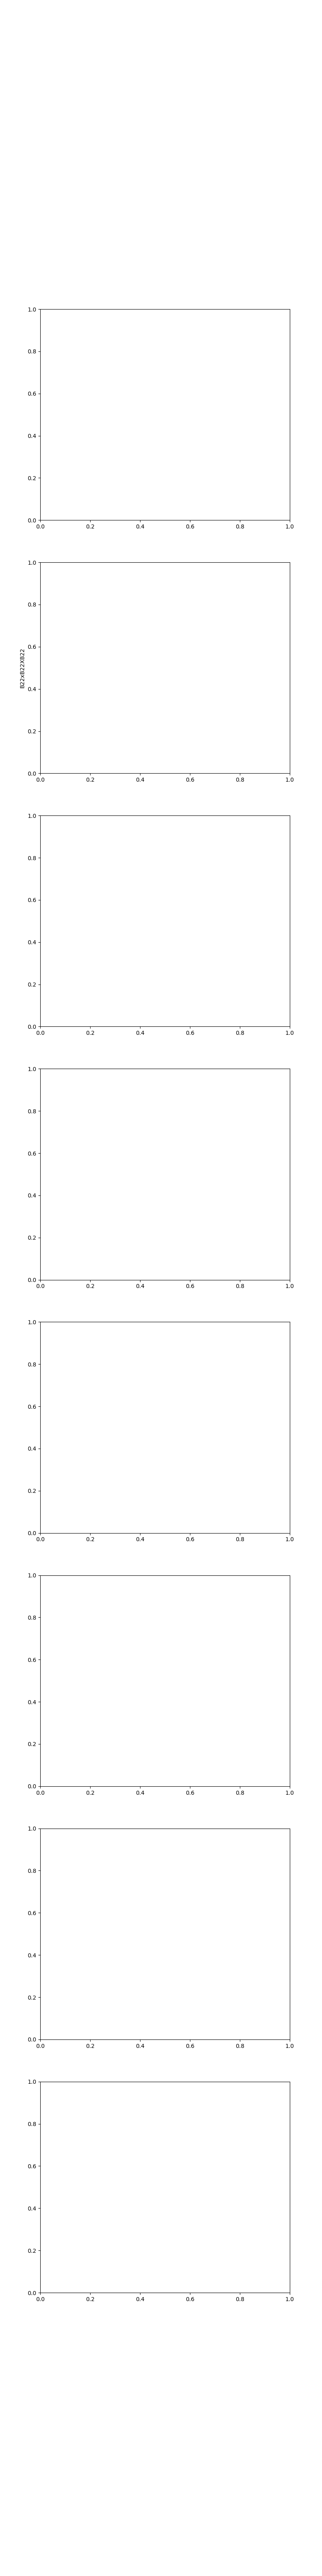

In [8]:
f,axs = plt.subplots(len(rvs), 1, figsize =(8,64))
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:grey", "tab:olive", "tab:cyan"]
for i in range(1,2):#range(0,len(rvs)):
    axs[i].set_ylabel(rv_names[i])
    for j in range(0,len(n_vals)):
        ts = np.linspace(5, np.max(ecc_dists[i]),100)
        axs[i].plot(ts,[tail_frequency(ecc_dists[i][j], t) for t in ts], label = n_vals[j], c=colors[j])
        #popt, pcov = curve_fit(func, [ts, [n_vals[j]]*len(ts)], [tail_frequency(ecc_dists[i][j],t) for t in ts], bounds=(0, 5))
        #axs[i].plot(ts,func([ts,[n_vals[j]]*len(ts)], *popt), c=colors[j], ls="--")

    
    axs[i].legend()
    axs[i].set_ylim((-0.1,1.1))
    

plt.show()

In [20]:
def func(X, a, b):
    x = X[0]
    n= X[1]
    return 2*np.exp(-a*(x+0*n)**2/n)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

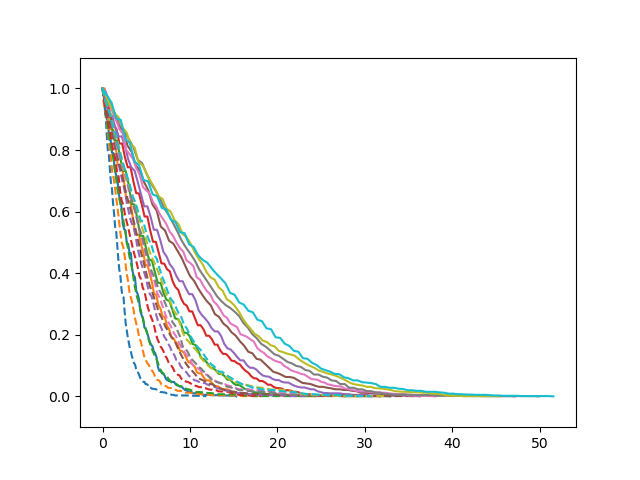

In [14]:
n_vals = np.array([50,100,150,200,250,300,350,400,450,500])
tailfreqs = []
beta_tailfreqs = []
stds = []
beta_stds = []

t_arrays = []
bt_arrays = []

f,ax = plt.subplots()
a_vals = []
b_vals = []
max_abs_difs = np.zeros_like(n_vals)

for j in tqdm(range(0,len(n_vals))):
    n = n_vals[j]
    rv = rvs[2]
    samplesUnif = (n**(1/3)) * np.array(gen_rv(rv,n,n_loops))
    rv=rvs[3]
    samplesBetaTrain = (n**(1/3)) * np.array(gen_rv(rv,n,n_loops))
    samplesBetaTest = (n**(1/3)) * np.array(gen_rv(rv,n,n_loops))
    eccsUnif = get_ecc(samplesUnif, 101,0.9)
    eccsBetaTrain = get_ecc(samplesBetaTrain, 101,0.9)
    eccsBetaTest = get_ecc(samplesBetaTest, 101,0.9)
    eccsBetaTest2 = get_ecc(samplesBetaTest, 101,0.9)

    eccs_unif_mean = np.mean(eccsUnif, axis= 0)
    eccs_beta_mean = np.mean(eccsBetaTrain, axis = 0)
    
    ecc_dists_unif_beta_train = pairwise_distances(eccs_unif_mean.reshape(1,-1), eccsBetaTrain, n_jobs = -1, metric = spdists.chebyshev)
    ecc_dists_unif_beta_test = pairwise_distances(eccs_unif_mean.reshape(1,-1), eccsBetaTest, n_jobs = -1, metric = spdists.chebyshev)
    ecc_dists_beta_mean_test = pairwise_distances(eccs_beta_mean.reshape(1,-1), eccsBetaTest, n_jobs = -1, metric = spdists.chebyshev)
    ecc_dists_beta_mean_test2 = pairwise_distances(eccs_beta_mean.reshape(1,-1), eccsBetaTest2, n_jobs = -1, metric = spdists.chebyshev)
    
    deviation_from_avg = np.abs(ecc_dists_unif_beta_test - np.mean(ecc_dists_unif_beta_train))
    beta_deviation_from_avg = np.abs(ecc_dists_beta_mean_test - np.mean(ecc_dists_beta_mean_test2))
    
    ts = np.linspace(0, np.max(deviation_from_avg[0]),100)
    bts = np.linspace(0, np.max(beta_deviation_from_avg[0]),100)
    t_arrays.append(ts)
    bt_arrays.append(bts)
    tailfreqs.append([tail_frequency(deviation_from_avg[0],t) for t in ts])
    beta_tailfreqs.append([tail_frequency(beta_deviation_from_avg[0],t) for t in bts])
    stds.append(np.std(deviation_from_avg[0]))
    beta_stds.append(np.std(beta_deviation_from_avg[0]))
    
    ax.plot(ts, [tail_frequency(deviation_from_avg[0],t) for t in ts], c= colors[j])
    ax.plot(bts, [tail_frequency(beta_deviation_from_avg[0],t) for t in bts], c= colors[j], ls = "--")
    #popt, pcov = curve_fit(func, [ts, [n_vals[j]]*len(ts)], [tail_frequency(deviation_from_avg[0],t) for t in ts], bounds=(0, [5,0.1]))
    #ax.plot(ts,func([ts,np.array([n_vals[j]]*len(ts))], *popt), c=colors[j], ls="--")
    #ax.plot(ts,2*np.exp(-3*ts**2/(n_vals[j])), c=colors[j], ls="--")
    ax.set_ylim((-0.1,1.1))
    #a_vals.append(popt[0])
    #b_vals.append(popt[1])
    max_abs_difs[j] = np.max(np.abs(np.mean(eccsBetaTrain, axis = 0)-eccs_unif_mean))
    
plt.show()

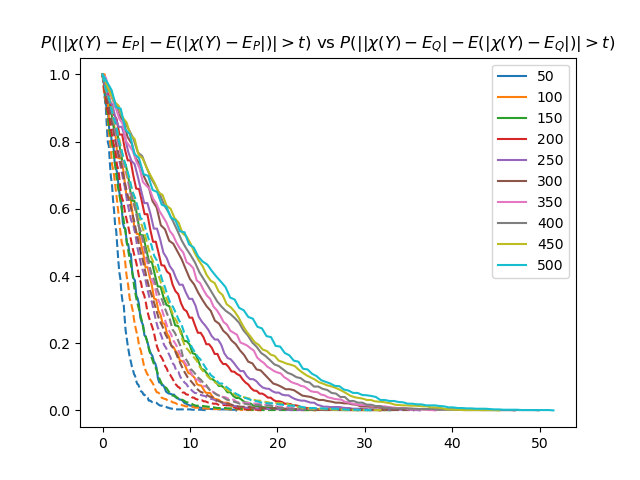

In [15]:

f,ax = plt.subplots()
for i in range(0,len(n_vals)):
    ax.plot(t_arrays[i], tailfreqs[i], label = n_vals[i], c = colors[i])
    ax.plot(bt_arrays[i], beta_tailfreqs[i], c = colors[i], ls = "--")
    #ax.plot(t_arrays[i], 2*np.exp(-t_arrays[i]**2/n_vals[i]), c=colors[i], label = "exp upper bound", ls = ":")
#ax.plot(ts, 2*np.exp(-0.005*(ts-2*max_abs_difs[-1])**2/n_vals[j]), ls="--")
ax.legend()
ax.set_title("$P(|\|\chi(Y)-E_P\|-E(\|\chi(Y)-E_P\|)|>t)$ vs $P(|\|\chi(Y) - E_Q\|-E(\|\chi(Y)-E_Q\|)|>t)$")
plt.show()

In [19]:
def func(x, a):
    return a*np.sqrt(x)

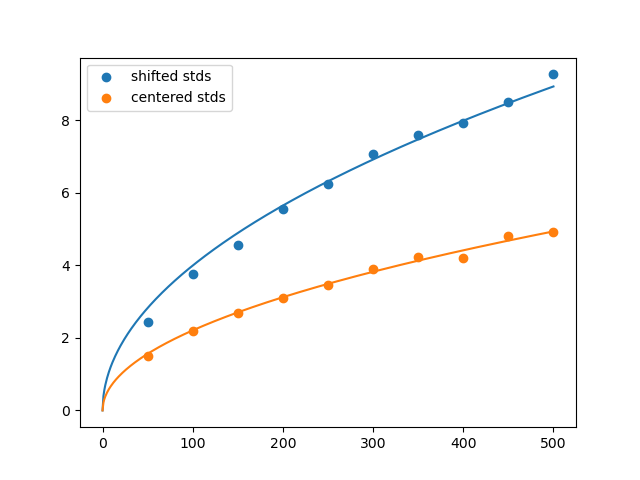

In [21]:
popt, pcov = curve_fit(func, n_vals, stds, bounds=(0, 5))
bopt, bcov = curve_fit(func, n_vals, beta_stds, bounds=(0, 5))

f,ax = plt.subplots()
ax.scatter(n_vals, stds, label = "shifted stds")
ax.scatter(n_vals, beta_stds, label = "centered stds")
x = np.linspace(0,500,501)
ax.plot(x, func(x,popt))
ax.plot(x, func(x,bopt))
ax.legend()
plt.show()

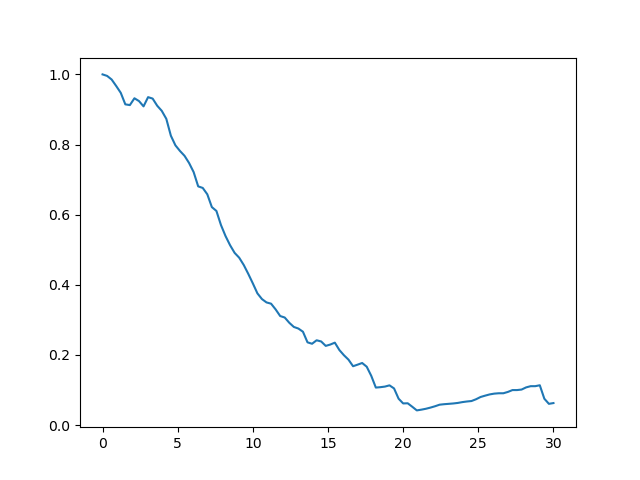

In [17]:
from scipy import interpolate
i=-1
f = interpolate.interp1d(t_arrays[i], tailfreqs[i])
g = interpolate.interp1d(bt_arrays[i], beta_tailfreqs[i])
fig,ax = plt.subplots()
x=np.linspace(0,30,100)
ax.plot(x,g(x)/f(x))
plt.show()

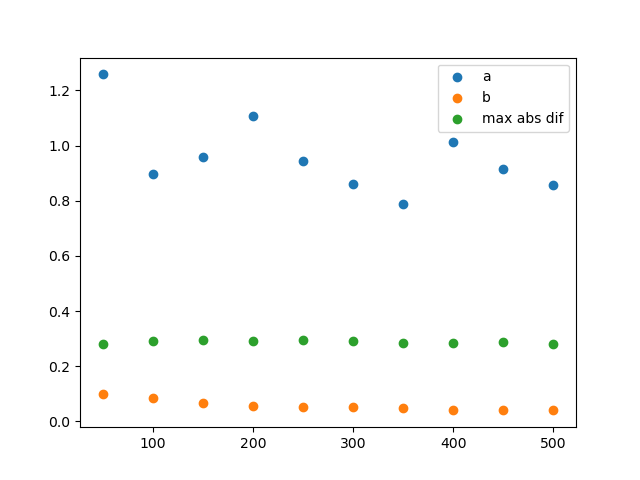

In [17]:
f,ax = plt.subplots()
ax.scatter(n_vals, a_vals, label="a")
ax.scatter(n_vals, b_vals, label="b")
ax.scatter(n_vals, max_abs_difs/n_vals, label = "max abs dif")
ax.legend()
plt.show()

In [104]:
print(a_vals)
print(b_vals)
print(max_abs_difs)

[1.2637774712702503, 0.9492599193951576, 0.9822911083705168, 0.8744260610211897, 0.7458925218667892, 0.8097794355719419, 0.8393698665460819, 0.6852388716253891, 1.0080281134590712, 0.69021529453798]
[0.09999999999999999, 0.08658758680075888, 0.06915197737343678, 0.06115300020587013, 0.06060192713403648, 0.052527437052685144, 0.04738312350881669, 0.0502917663430039, 0.03903971835709629, 0.044687719757309424]
[ 14  29  45  57  71  86 101 114 129 140]


In [114]:
print(deviation_from_avg[0])
ecc_mean_beta_train = np.mean(eccsBetaTrain, axis = 0)
ecc_dists_beta_test_to_mean_beta_train = pairwise_distances(ecc_mean_beta_train.reshape(1,-1), eccsBetaTest, n_jobs = -1, metric = spdists.chebyshev)
deviation_from_Q_avg = np.abs(ecc_dists_beta_test_to_mean_beta_train[0]-np.mean(ecc_dists_beta_test_to_mean_beta_train))
print(deviation_from_Q_avg)

[ 7.28645 17.71355  8.71355  6.28645 14.28355 16.77855  6.16355 11.15355
 15.50355 28.15355 14.91645 23.85145  1.46355  0.85855  2.28355  7.46355
  9.22145  4.49645  5.93145  5.77855  5.53645 12.50355 15.22145 18.50355
 13.22145  5.22145 11.80145 31.77855 27.14145 10.49645  7.85855 19.22145
  7.22145 20.28645  8.85855 36.15355 11.15355  2.28355 17.19855  0.53645
  2.19855 19.19855  8.80145  2.08355  5.80145 11.83645 12.14145 12.27145
  8.80145  7.22145 17.49645  2.80145  4.84645 18.71355 15.71355 22.71355
 16.22145  1.22145 10.77855 13.49645 14.22145  0.77855 23.28645 27.80145
  3.28645  9.71355 14.19855 21.80145 15.83645  0.91645 15.19855  4.15355
  9.77855  3.28645 15.71355 14.84645  2.49645 22.83645 10.08355 17.80145
  7.85855  2.77855  0.22145 12.28645  0.71355  0.49645 30.22145  7.53645
  8.71355 21.50355  6.85855  1.22145 10.50355 10.22145  5.22145  7.71355
  1.22145 17.15355  4.27145  9.50355  3.49645 40.77855  3.19855 12.77855
  6.84645 24.71355 10.46355  5.19855  0.77855 10.15

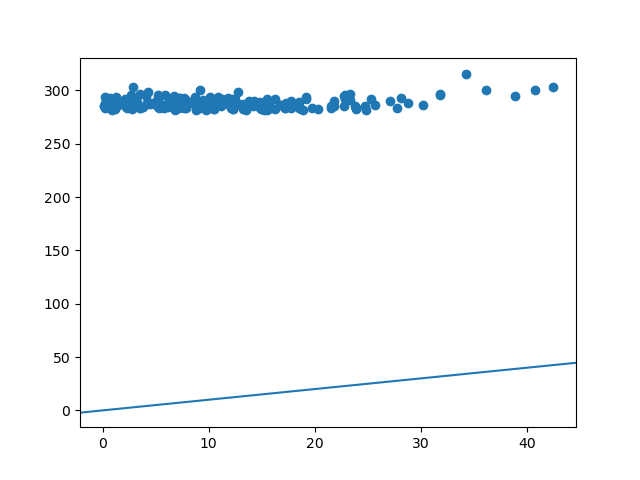

In [119]:
f,ax = plt.subplots()
#ax.scatter(range(0,len(deviation_from_avg[0])), deviation_from_avg)
ax.scatter(deviation_from_avg, deviation_from_Q_avg+2*np.max(np.abs(np.mean(eccsBetaTrain, axis = 0)-eccs_unif_mean)))
ax.axline((0,0), slope = 1)
plt.show()